<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/7thWeekTasks/XGBoost_on_tugasxgboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 7 : XGBoost


Dataset : tugasxgboost2.csv

Dokumentasi Chat GPT : [Link](https://chatgpt.com/share/67364e40-5c3c-8010-9e23-1a01948953cf)

<a href="https://colab.research.google.com/github/shintafiaa/Teaching-Assistant-Technobar/blob/main/Technobar/6_XGBoost_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

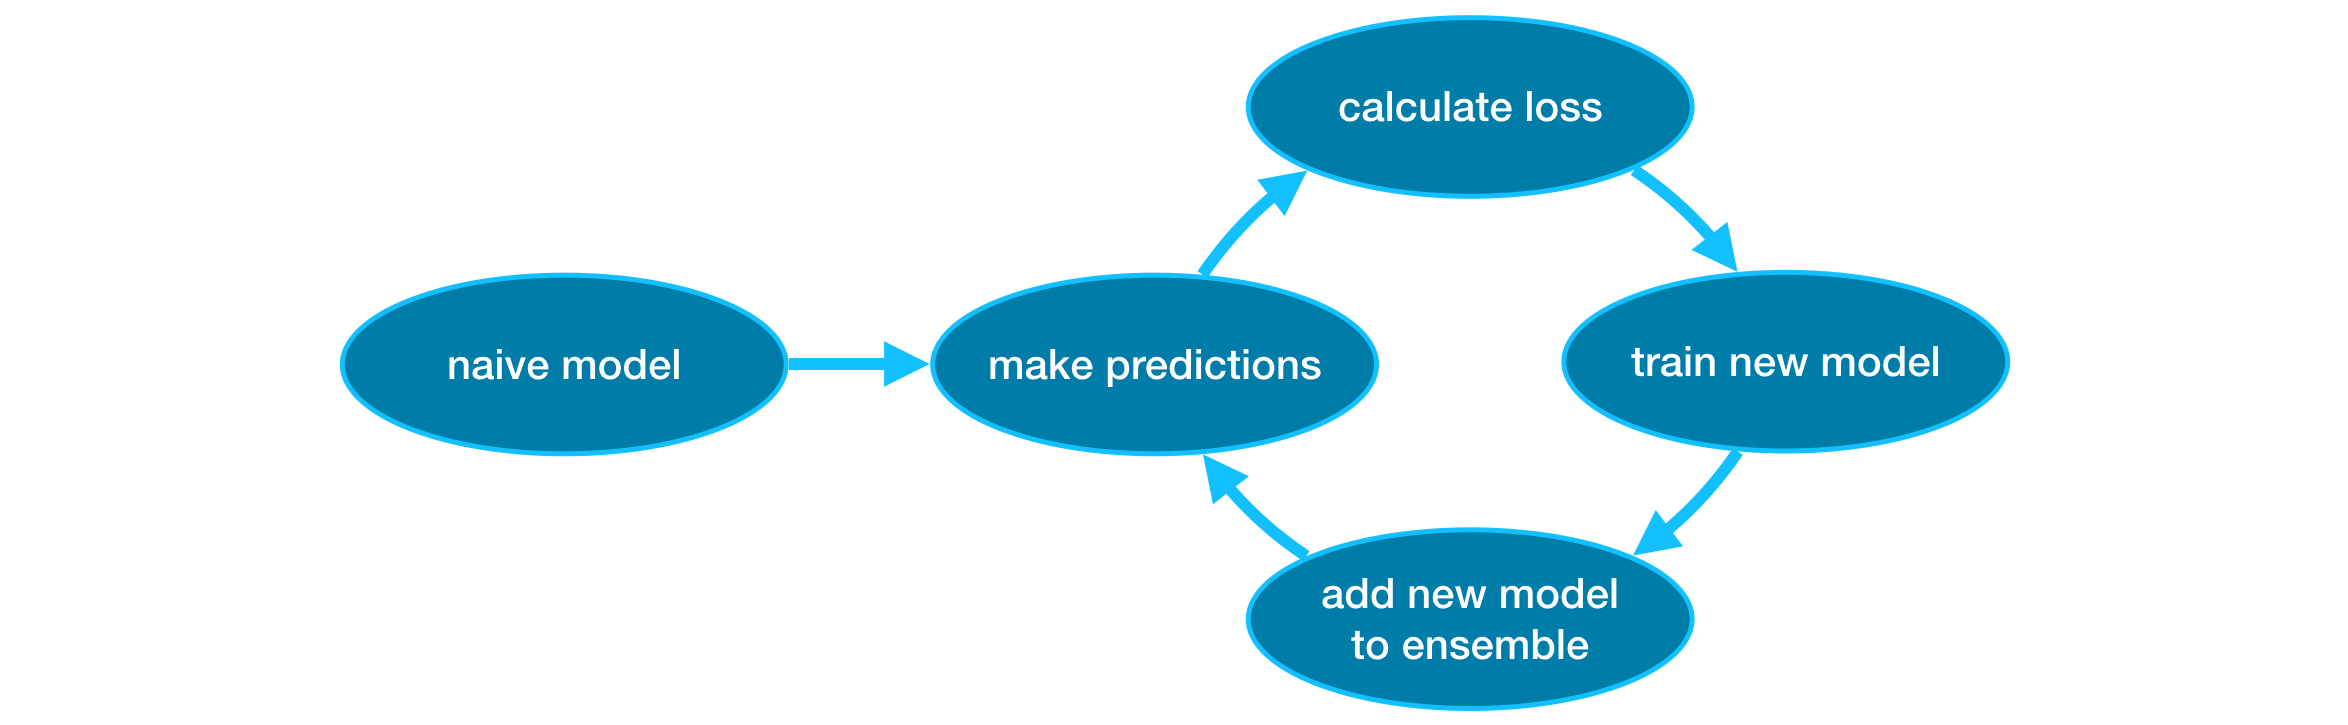

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [2]:
import pandas as pd

# Ganti 'path/to/your/file.csv' dengan path lengkap file CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost2.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari DataFrame
df.head()


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


**Prompt:**

Write a code cell to split the data into training and validation

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat data CSV dengan pemisah titik koma
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost2.csv'
df = pd.read_csv(file_path, delimiter=';')

# Memisahkan fitur dan target (misalnya, target adalah kolom 'quality')
X = df.drop(columns='quality')  # Fitur
y = df['quality']               # Target

# Membagi data menjadi pelatihan (train) dan validasi (test) dengan proporsi 80:20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran data pelatihan dan validasi
print("Data Pelatihan:", X_train.shape, y_train.shape)
print("Data Validasi:", X_val.shape, y_val.shape)

Data Pelatihan: (3918, 11) (3918,)
Data Validasi: (980, 11) (980,)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

Rata-rata Kesalahan Absolut (MAE) pada set validasi: 0.43920797401545


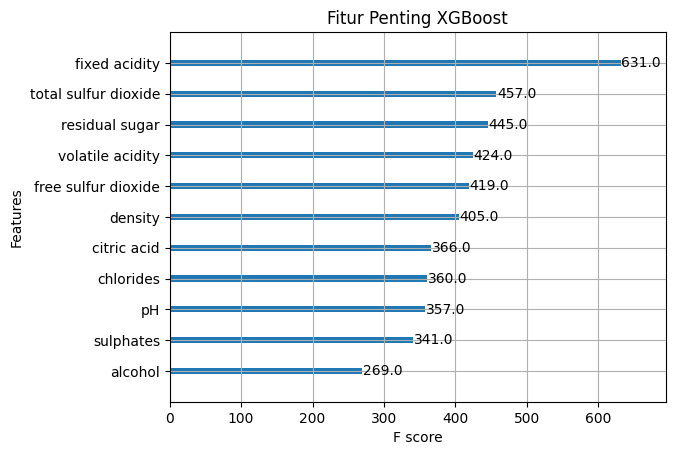

In [6]:
# Instalasi xgboost jika belum terinstal
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Menginisialisasi model XGBoost dengan parameter dasar
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai pada set validasi
y_pred = model.predict(X_val)

# Menghitung rata-rata kesalahan absolut
mae = mean_absolute_error(y_val, y_pred)
print("Rata-rata Kesalahan Absolut (MAE) pada set validasi:", mae)

# Visualisasi fitur penting
xgb.plot_importance(model)
plt.title("Fitur Penting XGBoost")
plt.show()


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

Rata-rata Kesalahan Absolut (MAE) pada set validasi dengan 500 estimator: 0.3922933128415322


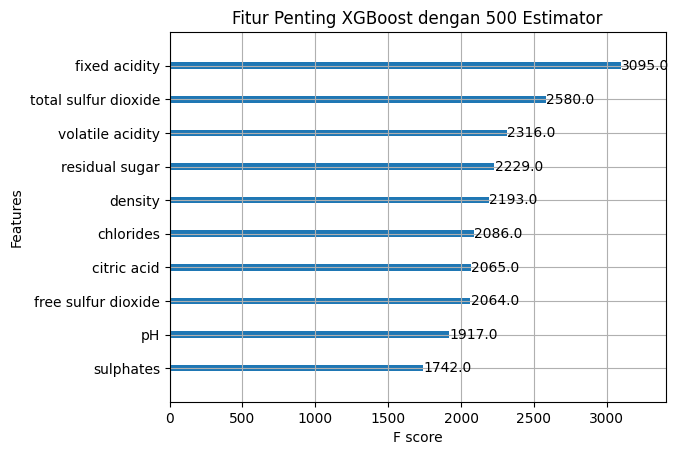

In [7]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Menginisialisasi model XGBoost dengan 500 estimator
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42)

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai pada set validasi
y_pred = model.predict(X_val)

# Menghitung rata-rata kesalahan absolut
mae = mean_absolute_error(y_val, y_pred)
print("Rata-rata Kesalahan Absolut (MAE) pada set validasi dengan 500 estimator:", mae)

# Visualisasi fitur penting
xgb.plot_importance(model, max_num_features=10)  # Menampilkan 10 fitur teratas
plt.title("Fitur Penting XGBoost dengan 500 Estimator")
plt.show()


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Menginisialisasi parameter model XGBoost dengan kecepatan pembelajaran khusus
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "eval_metric": "mae",  # Mengatur metrik evaluasi menjadi MAE
    "seed": 42
}

# Membuat DMatrix untuk data pelatihan dan validasi
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Variabel untuk menyimpan hasil evaluasi
evals_result = {}

# Melatih model dengan early stopping berdasarkan MAE pada set validasi
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=90,
    early_stopping_rounds=10,
    evals=evals,
    evals_result=evals_result,
    verbose_eval=False
)

# Memprediksi nilai pada set validasi
y_pred = model.predict(dval)

# Menghitung rata-rata kesalahan absolut
mae = mean_absolute_error(y_val, y_pred)
print("Rata-rata Kesalahan Absolut (MAE) pada set validasi:", mae)

# Memeriksa kunci evals_result untuk memastikan kunci yang benar
print("\nKunci evals_result:", evals_result.keys())

# Menampilkan evaluasi dalam bentuk tabel
# Periksa kunci untuk validasi
evals_df = pd.DataFrame(evals_result["validation"]["mae"], columns=["MAE"])
print("\nTabel Evaluasi:")
print(evals_df)


Rata-rata Kesalahan Absolut (MAE) pada set validasi: 0.49502970831734794

Kunci evals_result: dict_keys(['train', 'validation'])

Tabel Evaluasi:
         MAE
0   0.649877
1   0.630786
2   0.616739
3   0.605836
4   0.598005
..       ...
85  0.497259
86  0.497377
87  0.497284
88  0.496454
89  0.495030

[90 rows x 1 columns]


### **1. Visualisasi Feature Importance**

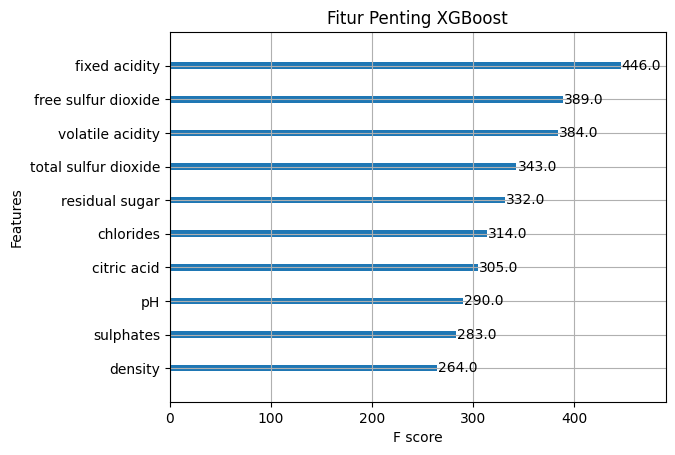

In [13]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Visualisasi fitur penting
xgb.plot_importance(model, max_num_features=10)  # Menampilkan 10 fitur teratas
plt.title("Fitur Penting XGBoost")
plt.show()


### **2. Visualisasi Struktur Pohon**

<Figure size 2000x1000 with 0 Axes>

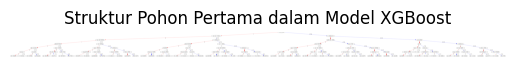

In [14]:
# Visualisasi struktur pohon pertama
plt.figure(figsize=(20, 10))
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk menampilkan pohon pertama
plt.title("Struktur Pohon Pertama dalam Model XGBoost")
plt.show()


### **3. Learning Curve**

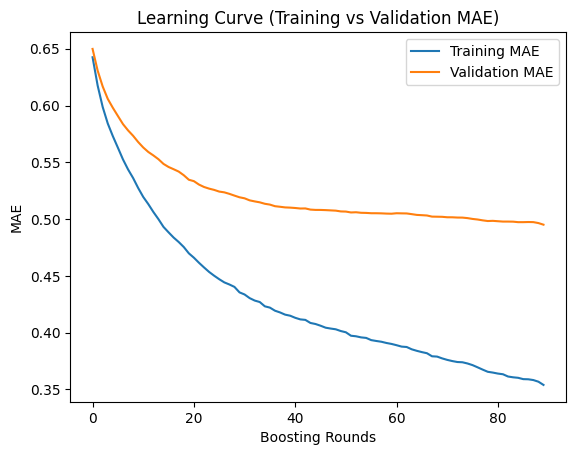

In [15]:
# Membuat DataFrame dari hasil evaluasi untuk visualisasi
evals_result_df = pd.DataFrame({
    "Training MAE": evals_result["train"]["mae"],
    "Validation MAE": evals_result["validation"]["mae"]
})

# Visualisasi learning curve
plt.plot(evals_result_df["Training MAE"], label="Training MAE")
plt.plot(evals_result_df["Validation MAE"], label="Validation MAE")
plt.xlabel("Boosting Rounds")
plt.ylabel("MAE")
plt.title("Learning Curve (Training vs Validation MAE)")
plt.legend()
plt.show()


**4. SHAP Values**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.2 MB/s eta 0:00:00


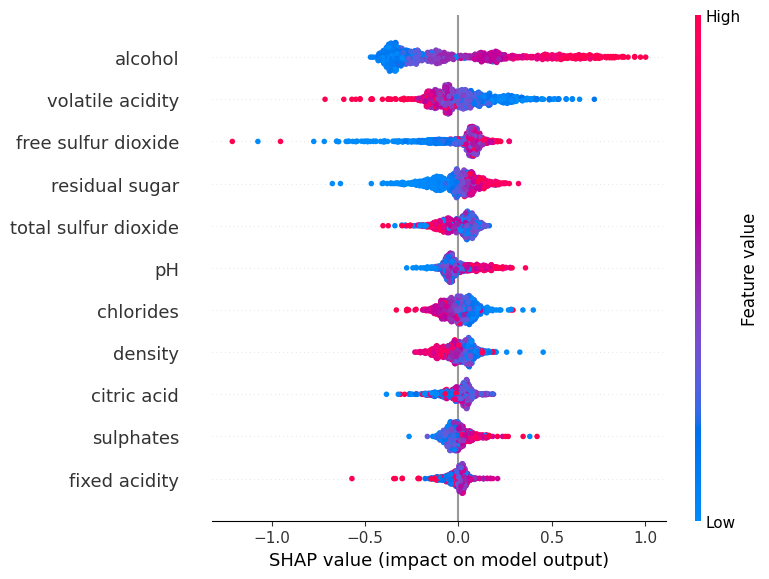

In [17]:
!pip install shap

import shap

# Memuat nilai SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_val)

# Visualisasi SHAP Summary Plot
shap.summary_plot(shap_values, X_val)


### **5. Partial Dependence Plot**

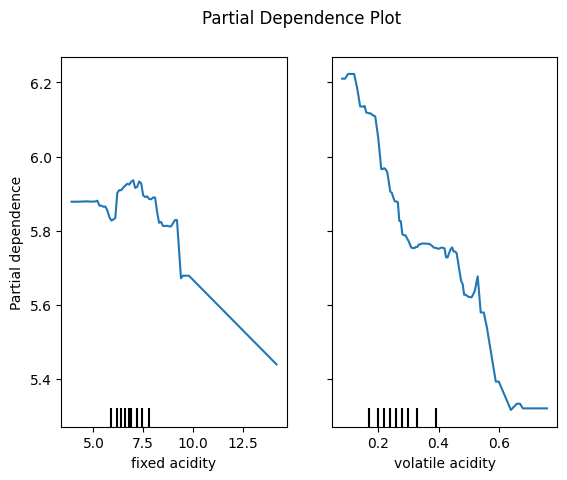

In [19]:
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBRegressor

# Melatih model dengan XGBRegressor
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    n_estimators=90,
    random_state=42
)
xgb_regressor.fit(X_train, y_train)

# Menampilkan Partial Dependence Plot untuk fitur tertentu, misalnya fitur ke-0 dan ke-1
features = [0, 1]  # Indeks fitur yang ingin divisualisasikan

# Plot Partial Dependence
PartialDependenceDisplay.from_estimator(xgb_regressor, X_val, features)
plt.suptitle("Partial Dependence Plot")
plt.show()
